In [78]:
from google.colab import drive
import pandas as pd
import numpy as np
import cv2 as cv
import os
from google.colab.patches import cv2_imshow

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model

In [79]:
drive.mount('/content/drive')
#@title fer2013 csv
shared_project_base_dir = 'My Drive/4A/CS486 Project' #@param {type:"string"}
full_project_dir = f"/content/drive/{shared_project_base_dir}"
data_dir = f"{full_project_dir}/preprocessed_data"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

In [81]:
simple_cnn_model = load_model(f"{full_project_dir}/Simple CNN/best_simple_CNN")

In [83]:
import random
def get_emotion_indices(predictions):
  emotions = []
  replaced = 0
  for label_likelyhoods in predictions:
    label_likelyhoods_and_emotion = [(val, i) for i, val in enumerate(label_likelyhoods)]
    label_likelyhoods_and_emotion.sort()
    most_likely_emotion = label_likelyhoods_and_emotion[-1][1]
    if most_likely_emotion == emotion_labels.index("Surprise"):
      # pick second most likely
      # random sample from those which have equal scores:
      second_most_likely_candidates = []
      second_most_likely_score = label_likelyhoods_and_emotion[-2][0]
      for score, emotion in label_likelyhoods_and_emotion[:-1]:
        if score == second_most_likely_score:
          second_most_likely_candidates.append(emotion)
      most_likely_emotion = random.choice(second_most_likely_candidates)
      print(f"replacing surprise with {emotion_labels[most_likely_emotion]}, score: {second_most_likely_score}")
      replaced += 1
    emotions.append(most_likely_emotion)
  print(f"Replaced {replaced}/{len(predictions)}")
  return emotions

In [85]:
def get_race_X_Y(race):
  return np.load(f"{data_dir}/msfde_{race}_X.npy", allow_pickle=True), np.load(f"{data_dir}/msfde_{race}_Y.npy", allow_pickle=True)

In [100]:
def show_predictions_plot(predictions):
  predictions_series = pd.Series([emotion_labels[i] for i in predictions])
  predictions_series = predictions_series.value_counts().sort_index()
  print(predictions_series)
  ax = predictions_series.plot(kind='bar')
  fig = ax.get_figure()
  fig.autofmt_xdate()
  fig.show()

def get_accuracy(prediction_y, actual_y):
  return np.mean(np.array(prediction_y) == np.array(actual_y))

replacing surprise with Fear, score: 6.090066930595913e-24
replacing surprise with Fear, score: 1.6001815761004825e-35
replacing surprise with Disgust, score: 0.0
replacing surprise with Fear, score: 0.0002367217093706131
replacing surprise with Angry, score: 0.0
replacing surprise with Happy, score: 0.0
replacing surprise with Fear, score: 3.1705299347662454e-18
replacing surprise with Neutral, score: 0.050995439291000366
replacing surprise with Fear, score: 0.16729092597961426
replacing surprise with Fear, score: 0.0
replacing surprise with Fear, score: 4.270441422704607e-08
replacing surprise with Neutral, score: 0.0
replacing surprise with Neutral, score: 0.0
replacing surprise with Angry, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Neutral, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Disgust, score:

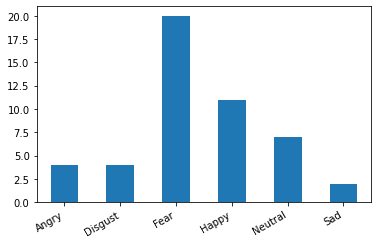

In [101]:
african_X, african_Y = get_race_X_Y("African")
african_preds = get_emotion_indices(simple_cnn_model(african_X))
# print(african_Y, african_preds)
show_predictions_plot(african_preds)
# show_predictions_plot(african_Y)
print(f"African SimpleCNN Accuracy: {get_accuracy(african_preds, african_Y)}")

replacing surprise with Disgust, score: 0.0
replacing surprise with Fear, score: 5.692583225748116e-27
replacing surprise with Disgust, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Neutral, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 0.0
Replaced 13/48
Angry       4
Disgust     2
Fear       25
Happy       6
Neutral     2
Sad         9
dtype: int64
Asian Accuracy: 0.16666666666666666


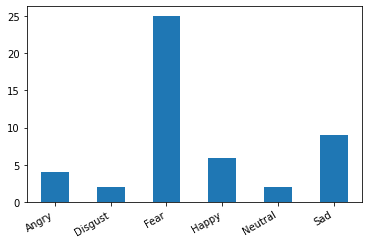

In [102]:
asian_X, asian_Y = get_race_X_Y("Asian")
asian_preds = get_emotion_indices(simple_cnn_model(asian_X))
show_predictions_plot(asian_preds)
print(f"Asian Accuracy: {get_accuracy(asian_preds, asian_Y)}")

48
replacing surprise with Happy, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 5.060996333567729e-22
replacing surprise with Disgust, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Disgust, score: 0.0
replacing surprise with Fear, score: 0.0
replacing surprise with Sad, score: 0.0
replacing surprise with Fear, score: 2.9452432510407907e-25
replacing surprise with Disgust, score: 0.0
replacing surprise with Neutral, score: 0.0
Replaced 13/48
Angry      13
Disgust     3
Fear       22
Happy       4
Neutral     1
Sad         5
dtype: int64
Caucasian accuracy: 0.1875


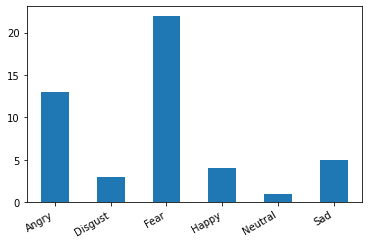

In [106]:
caucasian_X, caucasian_Y = get_race_X_Y("Caucasian")
print(len(caucasian_X))
caucasian_preds = get_emotion_indices(simple_cnn_model(caucasian_X))
show_predictions_plot(caucasian_preds)
print(f"Caucasian accuracy: {get_accuracy(caucasian_preds, caucasian_Y)}")

replacing surprise with Angry, score: 0.0
replacing surprise with Fear, score: 8.385454160701847e-24
Replaced 2/48
Angry       9
Fear       32
Happy       5
Neutral     2
dtype: int64
Hispanic accuracy: 0.16666666666666666


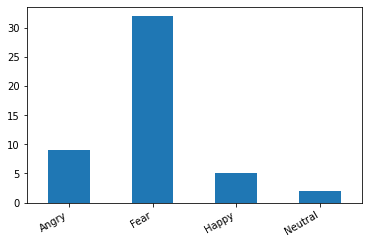

In [104]:
hispanic_X, hispanic_Y = get_race_X_Y("Hispanic")
hispanic_preds = get_emotion_indices(simple_cnn_model(hispanic_X))
show_predictions_plot(hispanic_preds)
print(f"Hispanic accuracy: {get_accuracy(hispanic_preds, hispanic_Y)}")

ResNet class

In [91]:
import torch
from torch import Tensor
import torch.nn as nn
from torch.hub import load_state_dict_from_url
from typing import Type, Any, Callable, Union, List, Optional

# Pretrained model URL, not in use
pretrained_model_urls = {
    'resnet18': 'https://download.pytorch.org/models/resnet18-5c106cde.pth',
}


class Bottleneck(nn.Module):
    # Bottleneck in torchvision places the stride for downsampling at 3x3 convolution(self.conv2)
    # while original implementation places the stride at the first 1x1 convolution(self.conv1)
    # according to "Deep residual learning for image recognition"https://arxiv.org/abs/1512.03385.
    # This variant is also known as ResNet V1.5 and improves accuracy according to
    # https://ngc.nvidia.com/catalog/model-scripts/nvidia:resnet_50_v1_5_for_pytorch.

    expansion: int = 4

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(Bottleneck, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        width = int(planes * (base_width / 64.)) * groups
        # Both self.conv2 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv1x1(inplanes, width)
        self.bn1 = norm_layer(width)
        self.conv2 = conv3x3(width, width, stride, groups, dilation)
        self.bn2 = norm_layer(width)
        self.conv3 = conv1x1(width, planes * self.expansion)
        self.bn3 = norm_layer(planes * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

def conv3x3(in_planes: int, out_planes: int, stride: int = 1, groups: int = 1, dilation: int = 1) -> nn.Conv2d:
    """3x3 convolution with padding"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=3, stride=stride,
                     padding=dilation, groups=groups, bias=False, dilation=dilation)

def conv1x1(in_planes: int, out_planes: int, stride: int = 1) -> nn.Conv2d:
    """1x1 convolution"""
    return nn.Conv2d(in_planes, out_planes, kernel_size=1, stride=stride, bias=False)


class BasicBlock(nn.Module):
    expansion: int = 1

    def __init__(
        self,
        inplanes: int,
        planes: int,
        stride: int = 1,
        downsample: Optional[nn.Module] = None,
        groups: int = 1,
        base_width: int = 64,
        dilation: int = 1,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(BasicBlock, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        if groups != 1 or base_width != 64:
            raise ValueError('BasicBlock only supports groups=1 and base_width=64')
        if dilation > 1:
            raise NotImplementedError("Dilation > 1 not supported in BasicBlock")
        # Both self.conv1 and self.downsample layers downsample the input when stride != 1
        self.conv1 = conv3x3(inplanes, planes, stride)
        self.bn1 = norm_layer(planes)
        self.relu = nn.ReLU(inplace=True)
        self.conv2 = conv3x3(planes, planes)
        self.bn2 = norm_layer(planes)
        self.downsample = downsample
        self.stride = stride

    def forward(self, x: Tensor) -> Tensor:
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):

    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        groups: int = 1,
        width_per_group: int = 64,
        replace_stride_with_dilation: Optional[List[bool]] = None,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer

        self.inplanes = 64
        self.dilation = 1
        if replace_stride_with_dilation is None:
            # each element in the tuple indicates if we should replace
            # the 2x2 stride with a dilated convolution instead
            replace_stride_with_dilation = [False, False, False]
        if len(replace_stride_with_dilation) != 3:
            raise ValueError("replace_stride_with_dilation should be None "
                             "or a 3-element tuple, got {}".format(replace_stride_with_dilation))
        self.groups = groups
        self.base_width = width_per_group

        # layers
        self.conv1 = nn.Conv2d(1, self.inplanes, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2, dilate=replace_stride_with_dilation[0])
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2, dilate=replace_stride_with_dilation[1])
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2, dilate=replace_stride_with_dilation[2])

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(256 * block.expansion, num_classes)

        self.conv6 = nn.Conv2d(512, 256, kernel_size=1, stride=2, bias=False)
        self.bn2 = norm_layer(256)
        self.relu2 = nn.ReLU(inplace=True)

        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)

    def _make_layer(self, block: Type[Union[BasicBlock, Bottleneck]], planes: int, blocks: int,
                    stride: int = 1, dilate: bool = False) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        previous_dilation = self.dilation
        if dilate:
            self.dilation *= stride
            stride = 1
        if stride != 1 or self.inplanes != planes * block.expansion:
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes * block.expansion, stride),
                norm_layer(planes * block.expansion),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.base_width, previous_dilation, norm_layer))
        self.inplanes = planes * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                base_width=self.base_width, dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def _forward_impl(self, x: Tensor) -> Tensor:
        # conv1,3*3,64
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)

        # conv2x,3*3,64
        x = self.maxpool(x)
        x = self.layer1(x)

        # conv3x,3*3,128
        x = self.layer2(x)

        # conv4x,3*3,128
        x = self.layer3(x)

        # conv5x,3*3,128
        x = self.layer4(x)

        # GAP
        x = self.avgpool(x)

        # conv6,1*1,256
        x = self.conv6(x)
        x = self.bn2(x)
        x = self.relu2(x)

        # conv7,1*1, 7
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

    def forward(self, x: Tensor) -> Tensor:
        return self._forward_impl(x)


def _resnet(arch: str, block: Type[Union[BasicBlock, Bottleneck]], layers: List[int], pretrained: bool, progress: bool, **kwargs: Any) -> ResNet:
    model = ResNet(block, layers, **kwargs)
    if pretrained:
        state_dict = load_state_dict_from_url(pretrained_model_urls[arch],
                                              progress=progress)
        model.load_state_dict(state_dict)
    return model

def resnet18(pretrained: bool = False, progress: bool = True, **kwargs: Any) -> ResNet:
    r"""ResNet-18 model from
    `"Deep Residual Learning for Image Recognition" <https://arxiv.org/pdf/1512.03385.pdf>`_
    Args:
        pretrained (bool): If True, returns a model pre-trained on ImageNet
        progress (bool): If True, displays a progress bar of the download to stderr
    """
    return _resnet('resnet18', BasicBlock, [2, 2, 2, 2], pretrained, progress,
                   **kwargs)





In [92]:
import torchvision

resnet_model = resnet18(num_classes=7)
PATH = f"{full_project_dir}/resnet_models/model_bs64_lr0.01_momentum0.95.pt"
resnet_model.load_state_dict(torch.load(PATH, map_location=torch.device('cpu')))
resnet_model.eval()
print(f"loaded resnet model from {PATH}")

loaded resnet model from /content/drive/My Drive/4A/CS486 Project/resnet_models/model_bs64_lr0.01_momentum0.95.pt


replacing surprise with Neutral, score: 2.602910041809082
replacing surprise with Neutral, score: 2.774925470352173
replacing surprise with Happy, score: 2.1193675994873047
replacing surprise with Neutral, score: 1.7675416469573975
replacing surprise with Neutral, score: 1.6031352281570435
replacing surprise with Happy, score: 2.295459747314453
replacing surprise with Neutral, score: 2.504833221435547
replacing surprise with Sad, score: 0.11488942801952362
replacing surprise with Neutral, score: 1.6538445949554443
replacing surprise with Neutral, score: 1.399024248123169
replacing surprise with Neutral, score: 3.791142702102661
replacing surprise with Fear, score: 2.697324752807617
replacing surprise with Happy, score: 2.6248462200164795
replacing surprise with Happy, score: 1.7209540605545044
replacing surprise with Happy, score: 3.2508835792541504
replacing surprise with Neutral, score: 0.3893897533416748
replacing surprise with Fear, score: 3.697031259536743
replacing surprise with 

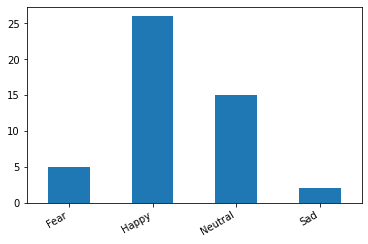

In [107]:
african_tensor_X = torch.stack(tuple(torchvision.transforms.functional.to_tensor(img).float() for img in african_X))
african_pytorch_preds = get_emotion_indices(resnet_model(african_tensor_X).data)
# print(african_pytorch_preds)
# print(african_Y, african_pytorch_preds)
show_predictions_plot(african_pytorch_preds)
print(f"African Resnet Accuracy: {get_accuracy(african_pytorch_preds, african_Y)}")

replacing surprise with Neutral, score: 2.2140161991119385
replacing surprise with Neutral, score: 1.6319363117218018
replacing surprise with Happy, score: 2.9831175804138184
replacing surprise with Happy, score: 2.0044994354248047
replacing surprise with Happy, score: 3.288562297821045
replacing surprise with Happy, score: 2.871635913848877
replacing surprise with Sad, score: 2.7234528064727783
replacing surprise with Sad, score: 2.4155890941619873
replacing surprise with Sad, score: 2.64691424369812
replacing surprise with Happy, score: 1.4363347291946411
replacing surprise with Happy, score: 1.3565993309020996
Replaced 11/48
Fear        1
Happy      22
Neutral     9
Sad        16
dtype: int64
asian Resnet Accuracy: 0.16666666666666666


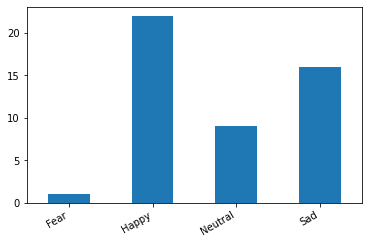

In [108]:
asian_tensor_X = torch.stack(tuple(torchvision.transforms.functional.to_tensor(img).float() for img in asian_X))
asian_pytorch_preds = get_emotion_indices(resnet_model(asian_tensor_X).data)
show_predictions_plot(asian_pytorch_preds)
print(f"asian Resnet Accuracy: {get_accuracy(asian_pytorch_preds, asian_Y)}")

replacing surprise with Sad, score: 2.875617742538452
replacing surprise with Happy, score: 2.788973331451416
replacing surprise with Sad, score: 2.07138991355896
replacing surprise with Happy, score: 2.0518569946289062
replacing surprise with Neutral, score: 2.2719380855560303
replacing surprise with Neutral, score: 0.9263054728507996
replacing surprise with Happy, score: 3.804826259613037
replacing surprise with Happy, score: 1.9795186519622803
replacing surprise with Happy, score: 1.991213321685791
replacing surprise with Sad, score: 2.223626136779785
Replaced 10/48
Happy      24
Neutral    11
Sad        13
dtype: int64
caucasian Resnet Accuracy: 0.1875


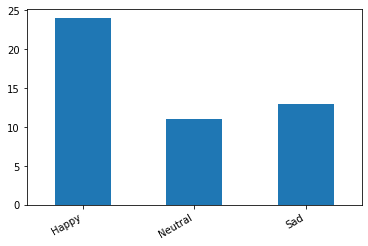

In [110]:
caucasian_tensor_X = torch.stack(tuple(torchvision.transforms.functional.to_tensor(img).float() for img in caucasian_X))
caucasian_pytorch_preds = get_emotion_indices(resnet_model(caucasian_tensor_X).data)
show_predictions_plot(caucasian_pytorch_preds)
print(f"caucasian Resnet Accuracy: {get_accuracy(caucasian_pytorch_preds, caucasian_Y)}")

replacing surprise with Fear, score: 1.4010319709777832
replacing surprise with Fear, score: 0.6925565600395203
replacing surprise with Happy, score: -0.23687952756881714
replacing surprise with Fear, score: 0.02371426671743393
replacing surprise with Neutral, score: 1.6699132919311523
replacing surprise with Happy, score: 0.3992110788822174
replacing surprise with Sad, score: 1.6571272611618042
replacing surprise with Happy, score: 1.8754289150238037
replacing surprise with Fear, score: 2.5059494972229004
replacing surprise with Fear, score: 1.720179796218872
replacing surprise with Neutral, score: 1.089242696762085
replacing surprise with Neutral, score: 0.10178957879543304
replacing surprise with Sad, score: 2.5388526916503906
replacing surprise with Sad, score: 2.1786787509918213
replacing surprise with Sad, score: 3.0300588607788086
replacing surprise with Sad, score: 2.215564250946045
replacing surprise with Sad, score: 2.0024161338806152
replacing surprise with Sad, score: 3.145

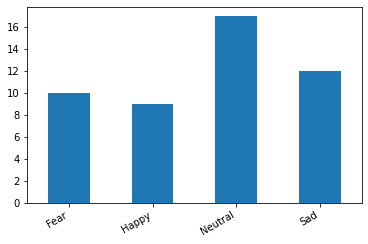

In [109]:
hispanic_tensor_X = torch.stack(tuple(torchvision.transforms.functional.to_tensor(img).float() for img in hispanic_X))
hispanic_pytorch_preds = get_emotion_indices(resnet_model(hispanic_tensor_X).data)
show_predictions_plot(hispanic_pytorch_preds)
print(f"Hispanic Resnet Accuracy: {get_accuracy(hispanic_pytorch_preds, hispanic_Y)}")